In [1]:
%load_ext autoreload
%autoreload 2
from utils import *
from IPython.display import display, HTML

In [ ]:
GeneExp = pd.read_csv("/Users/jiayao/Work/BrainDisorders/data/expression/brainspan/genes_microarray/expression_matrix.csv", header=None)
GeneRow = pd.read_csv("/Users/jiayao/Work/BrainDisorders/data/expression/brainspan/genes_microarray/rows_metadata.csv")
GeneCol = pd.read_csv("/Users/jiayao/Work/BrainDisorders/data/expression/brainspan/genes_microarray/columns_metadata.csv")
GeneCol["Period"] = GeneCol.apply(lambda row: TemporalMap(row["age"])[0], axis=1)
GeneCol["Description"] = GeneCol.apply(lambda row: TemporalMap(row["age"])[1], axis=1)
GeneDat = [GeneExp, GeneRow, GeneCol]

In [250]:
Regionsgt20 = ['OFC', 'VFC', 'HIP', 'ITC', 'AMY', 'DFC', 'STC', 'MFC', 'STR', 'IPC', 
            'V1C', 'S1C', 'A1C', 'M1C', 'CBC', 'MD']
AllRegions = [ 'URL', 'OFC', 'MGE', 'PCx', 'VFC', 'LGE', 'M1C-S1C', 'DTH', 'HIP', 'Ocx', 'CGE', 'ITC', 'AMY', 'DFC',
 'STC', 'MFC', 'TCx', 'STR', 'IPC', 'V1C','S1C', 'A1C', 'M1C', 'CB', 'CBC', 'MD']
Cortex = ['OFC', 'VFC', 'ITC', 'DFC', 'STC', 'MFC', 'IPC', 'V1C', 'S1C', 'A1C', 'M1C', 'CBC']

In [251]:
VarFile = "/Users/jiayao/Work/BrainDisorders/data/DenovoVariants/Autism_LGD.csv"
AssignVar2Gene(GeneRow, VarFile)
print GeneRow.head(2)
GeneRow_withVar = GeneRow[GeneRow["Vars"]!=""]
print GeneRow_withVar.head(2)
GeneRow_withVar.shape

NameError: name 'AssignVar2Gene' is not defined

In [ ]:
VarFile = "/Users/jiayao/Work/BrainDisorders/data/DenovoVariants/nn.3907-S3.xlsx"
GeneRow = pd.read_csv("/Users/jiayao/Work/BrainDisorders/data/expression/brainspan/genes_microarray/rows_metadata.csv")
df = pd.read_excel(VarFile, sheetname="Proband SNVs")
df["gene_symbol"] = df.apply(lambda row: row["Gene"].split(":")[0], axis=1)
df.head()
#print df.drop_duplicates("Effect type")
Effect_type = ["nonsense", "splice_site", "frame-shift", "splice-site", "Splice_Site", "Frameshift", "frameshift",
              "splice"]
Effect_genes = list(df[df["Effect type"].isin(Effect_type)]["gene_symbol"])
Effect_GeneRow = GeneRow[GeneRow["gene_symbol"].isin(Effect_genes)]
Effect_GeneRow.shape

In [ ]:
Genes = list(Effect_GeneRow["gene_symbol"])
DisplayGeneSumExpViolin(Genes, GeneDat, Regionsgt20)

In [ ]:
LookALLMutationTargetedGenes(Genes, Cortex, GeneDat)

In [ ]:
RamdonGenes = GeneRow.sample(1000)["gene_symbol"]
LookALLMutationTargetedGenes(RamdonGenes, Regionsgt20, GeneDat)

In [ ]:
M_bp_gene_col_meta = GeneCol[GeneCol["gender"]=="M"]
F_bp_gene_col_meta = GeneCol[GeneCol["gender"]=="F"]
LookALLMutationTargetedGenes(Genes, AllRegions, (GeneExp, GeneRow_withVar, M_bp_gene_col_meta))
LookALLMutationTargetedGenes(Genes, AllRegions, (GeneExp, GeneRow_withVar, F_bp_gene_col_meta))

In [ ]:
M_bp_gene_col_meta = GeneCol[GeneCol["gender"]=="M"]
F_bp_gene_col_meta = GeneCol[GeneCol["gender"]=="F"]

In [ ]:
M_bp_gene_col_meta.drop_duplicates("donor_id").groupby("Period").count()["donor_id"]

In [ ]:
F_bp_gene_col_meta.drop_duplicates("donor_id").groupby("Period").count()["donor_id"]

# HBT DATA

In [ ]:
ins = HBT_DATA()

In [ ]:
ins.extract_matrix_table("/Users/jiayao/Work/BrainDisorders/data/expression/HBT/GSE25219-GPL5175_series_matrix.txt",
                       "/Users/jiayao/Work/BrainDisorders/data/expression/HBT/GSE25219-GPL5175_exp_matrix.txt")
ins.extract_col_info("/Users/jiayao/Work/BrainDisorders/data/expression/HBT/GSE25219-GPL5175_series_matrix.txt",
                    "/Users/jiayao/Work/BrainDisorders/data/expression/HBT/GSE25219-GPL5175_columns_metadata.csv")
ins.extract_row_info("/Users/jiayao/Work/BrainDisorders/data/expression/HBT/GSE25219_family.soft",
                    "/Users/jiayao/Work/BrainDisorders/data/expression/HBT/GSE25219-GPL5175_rows_metadata.csv",
                    "GPL5175")

In [ ]:
GeneExp = pd.read_csv("/Users/jiayao/Work/BrainDisorders/data/expression/HBT/GSE25219-GPL5175_exp_matrix.txt",
                      index_col="ID_REF", delimiter="\t")
GeneRow = pd.read_csv("/Users/jiayao/Work/BrainDisorders/data/expression/HBT/GSE25219-GPL5175_rows_metadata.csv",
                     index_col="ID")
GeneCol = pd.read_csv("/Users/jiayao/Work/BrainDisorders/data/expression/HBT/GSE25219-GPL5175_columns_metadata.csv")

In [ ]:
GeneExp.head()

In [ ]:
ID_REFs = set(list(GeneExp.index))

In [ ]:
GeneCol.head(2)
Regions = list(set(list(GeneCol["region"])))
print Regions
print sorted(list(set(list(GeneCol["stage"]))))

In [ ]:
GeneExp.get_value(2315894, "GSM703918")

In [ ]:
def extract_gene(row):
    try:
        return row["gene_assignment"].split("//")[1].strip()
    except:
        return "---"
GeneRow = GeneRow[GeneRow.index.isin(ID_REFs)]
GeneRow["gene_symbol"] = GeneRow.apply(lambda row: extract_gene(row), axis=1)

In [ ]:
GeneRow.loc[2315894,:]
GeneDat = [GeneExp, GeneRow, GeneCol]

In [ ]:
VarFile = "/Users/jiayao/Work/BrainDisorders/data/DenovoVariants/nn.3907-S3.xlsx"
df = pd.read_excel(VarFile, sheetname="Proband SNVs")
df["gene_symbol"] = df.apply(lambda row: row["Gene"].split(":")[0], axis=1)
df.head()
#print df.drop_duplicates("Effect type")
Effect_type = ["nonsense", "splice_site", "frame-shift", "splice-site", "Splice_Site", "Frameshift", "frameshift",
              "splice"]
Effect_genes = list(df[df["Effect type"].isin(Effect_type)]["gene_symbol"])
Effect_GeneRow = GeneRow[GeneRow["gene_symbol"].isin(Effect_genes)]
Effect_GeneRow.shape

In [ ]:
#VarFile = "/Users/jiayao/Work/BrainDisorders/data/DenovoVariants/Autism_LGD.csv"
#AssignVar2Gene(GeneRow, VarFile)
#print GeneRow.head(2)
#GeneRow_withVar = GeneRow[GeneRow["Vars"]!=""]
#print GeneRow_withVar.head(2)
#GeneRow_withVar.shape

In [ ]:
GeneRow.head()

In [ ]:
Genes = list(Effect_GeneRow["gene_symbol"])
#DisplayGeneSumExpViolin(Genes, GeneDat, Regions)
ins = HBT_DATA()
ins.LookALLMutationTargetedGenesHBT(Genes, Regions, GeneDat)

In [ ]:
M_bp_gene_col_meta = GeneCol[GeneCol["sex"]=="M"]
F_bp_gene_col_meta = GeneCol[GeneCol["sex"]=="F"]
ins.LookALLMutationTargetedGenesHBT(Genes, Regions, (GeneExp, Effect_GeneRow, M_bp_gene_col_meta), ylim=(7.4, 8))
ins.LookALLMutationTargetedGenesHBT(Genes, Regions, (GeneExp, Effect_GeneRow, F_bp_gene_col_meta), ylim=(7.4, 8))

In [ ]:
print set(F_bp_gene_col_meta["stage"])

In [ ]:
rec_lgd_entrez_id = [x.strip() for x in file("/Users/jiayao/Work/BrainDisorders/data/DenovoVariants/wigler-rec-lgd.txt")]
print rec_lgd_entrez_id 
bs_GeneRow = pd.read_csv("/Users/jiayao/Work/BrainDisorders/data/expression/brainspan/genes_microarray/rows_metadata.csv")
rec_lgd_gene_symbols = list(bs_GeneRow[bs_GeneRow["entrez_id"].isin(rec_lgd_entrez_id)]["gene_symbol"])
print len(rec_lgd_gene_symbols), rec_lgd_gene_symbols

In [ ]:
ins = HBT_DATA()
ins.LookALLMutationTargetedGenesHBT(rec_lgd_gene_symbols, Regions, GeneDat)

In [ ]:
M_bp_gene_col_meta = GeneCol[GeneCol["sex"]=="M"]
F_bp_gene_col_meta = GeneCol[GeneCol["sex"]=="F"]
ins.LookALLMutationTargetedGenesHBT(rec_lgd_gene_symbols, Regions, (GeneExp, Effect_GeneRow, M_bp_gene_col_meta))
ins.LookALLMutationTargetedGenesHBT(rec_lgd_gene_symbols, Regions, (GeneExp, Effect_GeneRow, F_bp_gene_col_meta), ylim=(9, 10.2))

In [ ]:
entrez_symbol_map = get_gene_entrez_symbol_map()
vitkup_channel_genes = set([entrez_symbol_map[x.strip()] for x in file(vitkup_channel)])
vitkup_chromatin_genes = set([entrez_symbol_map[x.strip()] for x in file(vitkup_chromatin)])
vitkup_psd_genes = set([entrez_symbol_map[x.strip()] for x in file(vitkup_psd)])
vitkup_sig_skel_genes = set([entrez_symbol_map[x.strip()] for x in file(vitkup_sig_skel)])

In [ ]:
print len(vitkup_channel_genes) + len(vitkup_chromatin_genes) + len(vitkup_psd_genes) + len(vitkup_sig_skel_genes)

In [ ]:
print len(vitkup_channel_genes.union(vitkup_chromatin_genes).union(vitkup_psd_genes).union(vitkup_sig_skel_genes))

In [ ]:
VarFile = "/Users/jiayao/Work/BrainDisorders/data/DenovoVariants/wigler2014LGD.xlsx"
VarDF = pd.read_excel(VarFile)
VarDF.head()

In [ ]:
print dict(zip(list(VarDF["inChild"]), list(VarDF["inChild"])))

# Gene RPKM & Exon RPKM

In [53]:
ins = BrainSpan()
# Columns Meta Data
bp_exon_col_meta = pd.read_csv(
    "/Users/jiayao/Work/BrainDisorders/data/expression/brainspan/exons_matrix/columns_metadata.csv", delimiter=",")
bp_exon_col_meta["Period"] = bp_exon_col_meta.apply(lambda row: ins.TemporalMap(row["age"])[0], axis=1)
bp_exon_col_meta["Stage"] = bp_exon_col_meta.apply(lambda row: ins.TemporalMap(row["age"])[1], axis=1)
bp_exon_col_meta["Description"] = bp_exon_col_meta.apply(lambda row: ins.TemporalMap(row["age"])[2], axis=1)
display(bp_exon_col_meta.head(2)) 
# Rows Meta Data
bp_exon_row_meta = pd.read_csv(
    "/Users/jiayao/Work/BrainDisorders/data/expression/brainspan/exons_matrix/rows_metadata.csv", delimiter=",")
bp_exon_row_meta["exon length"] = bp_exon_row_meta["end"] - bp_exon_row_meta["start"]
display(bp_exon_row_meta.head(2))
# Exon RPKM Matrix
ExonExp = pd.read_csv("../data/expression/brainspan/exons_matrix/expression_matrix.csv", header=None)
display(ExonExp.head(2))

GeneExp = pd.read_csv("/Users/jiayao/Work/BrainDisorders/data/expression/brainspan/gene_matrix/expression_matrix.csv", header=None)
GeneRow = pd.read_csv("/Users/jiayao/Work/BrainDisorders/data/expression/brainspan/gene_matrix/rows_metadata.csv")
GeneCol = pd.read_csv("/Users/jiayao/Work/BrainDisorders/data/expression/brainspan/gene_matrix/columns_metadata.csv")
GeneCol["Period"] = GeneCol.apply(lambda row: ins.TemporalMap(row["age"])[0], axis=1)
GeneCol["Stage"] = GeneCol.apply(lambda row: ins.TemporalMap(row["age"])[1], axis=1)
GeneCol["Description"] = GeneCol.apply(lambda row: ins.TemporalMap(row["age"])[2], axis=1)
GeneDat = [GeneExp, GeneRow, GeneCol]

,column_num,donor_id,donor_name,age,gender,structure_id,structure_acronym,structure_name,Period,Stage,Description
0,1,13058,H376.IIA.51,8 pcw,M,10665,URL,upper (rostral) rhombic lip,2A,2,Early prenatal
1,2,13058,H376.IIA.51,8 pcw,M,10194,OFC,orbital frontal cortex,2A,2,Early prenatal


,row_num,gene_id,ensembl_gene_id,gene_symbol,entrez_id,start,end,exon length
0,1,1086864,ENSG00000000003,TSPAN6,7105.0,99883666,99884983,1317
1,2,1086864,ENSG00000000003,TSPAN6,7105.0,99885755,99885863,108


,0,1,2,3,4,5,6,7,8,9,...,515,516,517,518,519,520,521,522,523,524
0,1,13.636583,40.862901,32.178981,27.939465,29.324584,23.885710,24.887880,16.432391,45.570680,...,4.347437,4.101772,2.987192,3.862508,3.362597,2.566516,3.049593,5.025746,1.893471,8.942586
1,2,31.731240,86.587706,60.131360,57.718046,58.326412,54.090394,50.138146,35.408905,94.937737,...,6.332389,5.479924,5.946744,6.017439,5.585987,3.870925,4.083335,7.451925,2.946266,3.868906


In [62]:
# Exon RPKM Norm by Gene RPKM
NormExonExp = pd.read_csv(
    "/Users/jiayao/Work/BrainDisorders/data/expression/brainspan/exons_matrix/NormedExonExpMatrix.csv", header = None)
NormExonExp.head(2)

,0,1,2,3,4,5,6,7,8,9,...,515,516,517,518,519,520,521,522,523,524
0,1,0.92888,0.994602,1.163014,1.058665,0.973158,1.077006,1.026251,0.991086,1.055019,...,1.260625,1.330526,1.289509,1.307571,1.108135,1.232750,1.339092,1.442238,1.217121,1.856548
1,2,2.16143,2.107543,2.173270,2.187017,1.935605,2.438935,2.067446,2.135616,2.197930,...,1.836202,1.777569,2.567087,2.037077,1.840848,1.859284,1.793013,2.138479,1.893857,0.803214


In [ ]:
Gene = "CHD8"
Region = "OFC"
Doner = "H376.IIA.51"
g_row = GeneRow[GeneRow["gene_symbol"]==Gene].index.values[0]
g_col = GeneCol[ (GeneCol["structure_acronym"]==Region) & (GeneCol["donor_name"]==Doner) ]["column_num"].values[0]
print g_row
print g_col
GeneRPKM = GeneExp.get_value(row, column)
display(GeneRPKM)

In [ ]:
e_row = bp_exon_row_meta[bp_exon_row_meta["gene_symbol"]==Gene]
display(e_row.head(3))
rows = e_row.index.values
e_col = bp_exon_col_meta[ (bp_exon_col_meta["structure_acronym"]==Region) & 
                         (bp_exon_col_meta["donor_name"]==Doner) ]
display(e_col)
col = e_col["column_num"].values[0]
ExonRPKM = ExonExp.loc[rows[0]:rows[-1], col]
display(ExonRPKM.head(5))

In [ ]:
e_lengths = [int(x) for x in e_row["exon length"].values]
GeneLen = sum(e_lengths)
print GeneLen
GrcountM = GeneLen * GeneRPKM
print GrcountM

In [ ]:
res = []
for leng, RPKM in zip(e_lengths, ExonRPKM):
    res.append(leng*RPKM) #leng, RPKM
print sum(res)

In [ ]:
def checkGeneExonRCM(Gene, Region, Doner):
    g_row = GeneRow[GeneRow["gene_symbol"]==Gene].index.values[0]
    g_col = GeneCol[ (GeneCol["structure_acronym"]==Region) & (GeneCol["donor_name"]==Doner) ]["column_num"].values[0]
    GeneRPKM = GeneExp.get_value(g_row, g_col)
    e_row = bp_exon_row_meta[bp_exon_row_meta["gene_symbol"]==Gene]
    rows = e_row.index.values
    e_col = bp_exon_col_meta[ (bp_exon_col_meta["structure_acronym"]==Region) & 
                             (bp_exon_col_meta["donor_name"]==Doner) ]
    col = e_col["column_num"].values[0]
    ExonRPKM = ExonExp.loc[rows[0]:rows[-1], col]
    e_lengths = [int(x) for x in e_row["exon length"].values]
    GeneLen = sum(e_lengths)
    GrcountM = GeneLen * GeneRPKM
    res = []
    for leng, RPKM in zip(e_lengths, ExonRPKM):
        res.append(leng*RPKM) #leng, RPKM
    print "Gene RCM: {}\tExon RCM sum: {}\t\t diff: {}%".format(GrcountM, sum(res), round(100 * abs(GrcountM-sum(res))/GrcountM, 4))

In [ ]:
Gene = "CHD8"
Region = "OFC"
Doner = "H376.IIA.51"
checkGeneExonRCM(Gene, Region, Doner)

In [55]:
Regionsgt20 = ['OFC', 'VFC', 'HIP', 'ITC', 'AMY', 'DFC', 'STC', 'MFC', 'STR', 'IPC', 
            'V1C', 'S1C', 'A1C', 'M1C', 'CBC', 'MD']
for Region in Regionsgt20:
    try:
        checkGeneExonRCM(Gene, Region, Doner)
    except:
        print Region

OFC
VFC
HIP
ITC
AMY
DFC
STC
MFC
STR
IPC
V1C
S1C
A1C
M1C
CBC
MD


In [ ]:
Genes = ['THSD7A', 'SPEN', 'WAC', 'ANK2', 'DYRK1A']
for Gene in Genes:
    try:
        checkGeneExonRCM(Gene, "STC", Doner)
    except:
        print Region

In [ ]:
Doners = ['H376.IIA.50', 'H376.IIIB.50', 'H376.VIII.54', 'H376.XI.52', 'H376.XI.56']
for Doner in Doners:
    try:
        checkGeneExonRCM(Gene, "STC", Doner)
    except:
        print Doner

In [ ]:
large_last_exons = ('yellow', list(bp_exon_row_meta_with_var[bp_exon_row_meta_with_var
                                                  ["Last"]=="T"]["row_num"]))
seq = ins.LoadingDat2SeqCrossRecordCrossRegion(large_last_exons, Regionsgt20, 
                                               bp_exon_row_meta, bp_exon_col_meta, ExonExp)

[17.733333333333334, 24.4, 27.733333333333334, 26.066666666666666, 26.066666666666666, 21.066666666666666, 14.4, 11.1, 7.8, 7.866666666666666, 7.916666666666667, 7.916666666666667, 7.933333333333334, 7.9, 7.833333333333333]


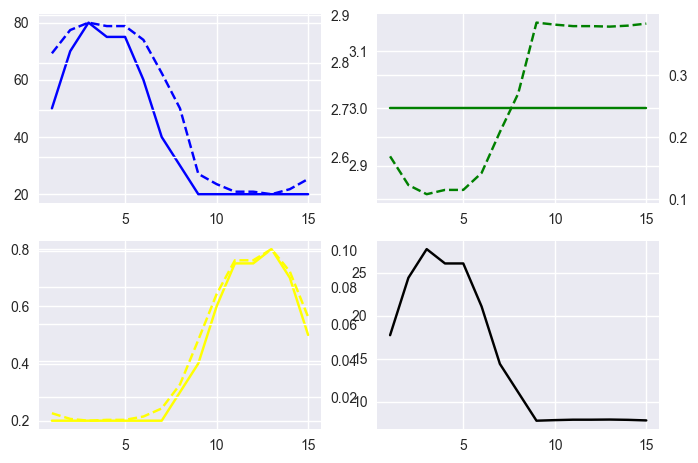

In [20]:
Ex1 = [50,70,80,75,75,60,40,30,20,20,20,20,20,20,20]
Ex1 = [x*100 for x in Ex1]
Ex1_L = 100
Ex1_rpkm = [float(x)/Ex1_L for x in Ex1]

Ex2 = [300] * 15
Ex2_L = 100
Ex2_rpkm = [float(x)/Ex2_L for x in Ex2]

Ex3 = [50,70,80,75,75,60,40,30,20,20,20,20,20,20,20][::-1]
Ex3_L = 100
Ex3_rpkm = [float(x)/Ex3_L for x in Ex3]

GeneL = Ex1_L + Ex2_L + Ex3_L
GeneRPKM = [float(x+y+z)/GeneL for x,y,z in zip(Ex1, Ex2, Ex3)]
print GeneRPKM

plt.close('all')
fig, axes = plt.subplots(2, 2, dpi=100)

axes[0, 0].plot(xrange(1,16), Ex1_rpkm, 'blue')
axes[0, 1].plot(xrange(1,16), Ex2_rpkm, 'green')
axes[1, 0].plot(xrange(1,16), Ex3_rpkm, 'yellow')
ax200 = axes[0, 0].twinx()
ax201 = axes[0, 1].twinx()
ax202 = axes[1, 0].twinx()
ax200.plot(xrange(1,16), [x/y for x,y in zip(Ex1_rpkm,GeneRPKM)], '--' ,color='blue')
ax201.plot(xrange(1,16), [x/y for x,y in zip(Ex2_rpkm,GeneRPKM)], '--' ,color='green')
ax202.plot(xrange(1,16), [x/y for x,y in zip(Ex3_rpkm,GeneRPKM)], '--' ,color='yellow')

axes[1, 1].plot(xrange(1,16), GeneRPKM, 'black')
#ax.axvline(x=7.5)
plt.show()

In [34]:
# Exons: list of (Exonlength, ExonRcount) pairs
def plot(Exons):
    plt.close('all')
    fig, axes = plt.subplots(len(Exons)+1, dpi=100)
    GeneL = sum(ExonL for ExonL,ExonRC in Exons)
    print GeneL
    GeneRPKM = [0] * 15
    for j in range(15): # for each time point
        for i, (lengthExon, ExonRcount) in enumerate(Exons): #for each Exon
            GeneRPKM[j] += ExonRcount[j]
        GeneRPKM[j] / GeneL
    for i, (lengthExon, ExonRcount) in enumerate(Exons):
        Ex_rpkm = [float(x)/lengthExon for x in ExonRcount]
        axes[i].plot(xrange(1,16), Ex_rpkm)
        ax2tmp = axes[i].twinx()
        ax2tmp.plot(xrange(1,16), [x/y for x,y in zip(Ex_rpkm,GeneRPKM)], '--')
    axes[i+1].plot(xrange(1,16), GeneRPKM, 'black')
    #ax.axvline(x=7.5)
    plt.show()

300


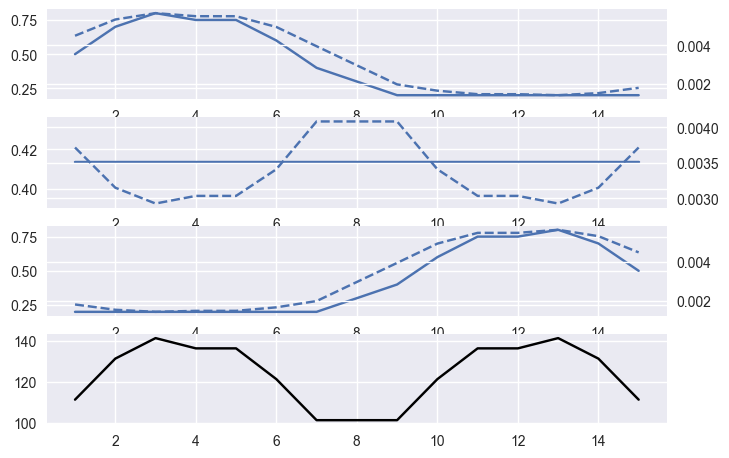

In [41]:
Ex1_RC = [50,70,80,75,75,60,40,30,20,20,20,20,20,20,20]
#Ex1 = [x*100 for x in Ex1]
Ex1_L = 100

Ex2_RC = [41.33] * 15
Ex2_L = 100
Ex2_rpkm = [float(x)/Ex2_L for x in Ex2]

Ex3_RC = [50,70,80,75,75,60,40,30,20,20,20,20,20,20,20][::-1]
#Ex3 = [x*100 for x in Ex3]
Ex3_L = 100
Ex3_rpkm = [float(x)/Ex3_L for x in Ex3]

Exons = [(Ex1_L, Ex1_RC), (Ex2_L, Ex2_RC), (Ex3_L, Ex3_RC)]
plot(Exons)

210


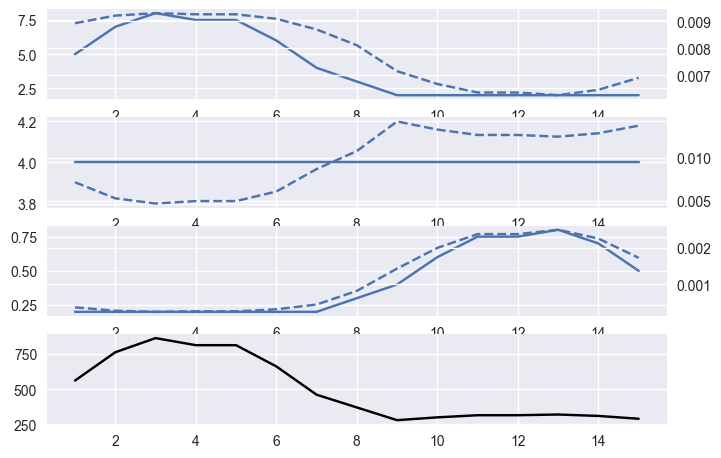

In [52]:
Ex1_RC = [50,70,80,75,75,60,40,30,20,20,20,20,20,20,20]
Ex1 = [x*10 for x in Ex1_RC]
Ex1_L = 100

Ex2_RC = [40] * 15
Ex2_L = 10

Ex3_RC = [50,70,80,75,75,60,40,30,20,20,20,20,20,20,20][::-1]
#Ex3_RC = [0] * 15
#Ex3 = [x*100 for x in Ex3]
Ex3_L = 100

Exons = [(Ex1_L, Ex1), (Ex2_L, Ex2_RC), (Ex3_L, Ex3_RC)]
plot(Exons)

15
300


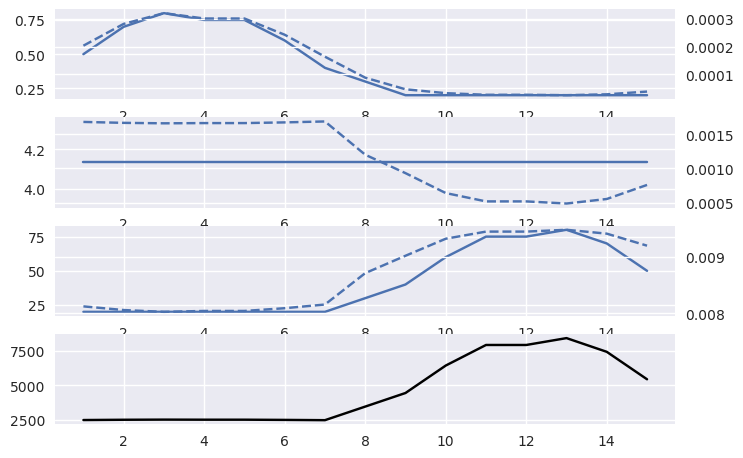

In [73]:
Ex1_RC = [50,70,80,75,75,60,40,30,20,20,20,20,20,20,20]
print len(Ex1_RC)
Ex1 = [x*100 for x in Ex1_RC]
Ex1_L = 100

Ex2_RC = [41.33*10] * 15
Ex2_L = 100
Ex2_rpkm = [float(x)/Ex2_L for x in Ex2]

Ex3_RC = [50,70,80,75,75,60,40,30,20,20,20,20,20,20,20][::-1]
Ex3 = [x*100 for x in Ex3_RC]
Ex3_L = 100
Ex3_rpkm = [float(x)/Ex3_L for x in Ex3]

Exons = [(Ex1_L, Ex1_RC), (Ex2_L, Ex2_RC), (Ex3_L, Ex3)]
plot(Exons)

In [145]:
# Exons: list of (Exonlength, ExonRcount) pairs
def plot2(Exons):
    plt.close('all')
    #fig, axes = plt.subplots(len(Exons)+1, dpi=100)
    fig, (ax1, ax2) = plt.subplots(2, dpi=100)
    GeneL = sum([ExonL for ExonL,ExonRC in Exons])
    print "GeneLen",GeneL
    GeneRPKM = [0] * 15
    for j in range(15): # for each time point
        for i, (lengthExon, ExonRcount) in enumerate(Exons): #for each Exon
            GeneRPKM[j] += float(ExonRcount[j])
        GeneRPKM[j] = float(GeneRPKM[j]) / GeneL
    ax1_2 = ax1.twinx()
    for i, (lengthExon, ExonRcount) in enumerate(Exons):
        Ex_rpkm = [float(x)/lengthExon for x in ExonRcount]
        if i == 0:
            ax1.plot(xrange(1,16), Ex_rpkm, color="red")
            ax1_2.plot(xrange(1,16), [x/y for x,y in zip(Ex_rpkm,GeneRPKM)], '--', color="red")     
        elif i == len(Exons)-1:
            ax1.plot(xrange(1,16), Ex_rpkm, color="blue")
            ax1_2.plot(xrange(1,16), [x/y for x,y in zip(Ex_rpkm,GeneRPKM)], '--', color="blue")
        else:
            ax1.plot(xrange(1,16), Ex_rpkm, color="yellow")
            ax1_2.plot(xrange(1,16), [x/y for x,y in zip(Ex_rpkm,GeneRPKM)], '--', color="yellow")
    
    ax2.plot(xrange(1,16), GeneRPKM, 'black')
    nonT = [0] * 15
    for j in range(15):
        for i, (lengthExon, ExonRcount) in enumerate(Exons[1:]):
            nonT[j] += (float(ExonRcount[j])/lengthExon)/GeneRPKM[j]
        nonT[j] = nonT[j]/len(Exons[1:])
    ax1_2.plot(xrange(1, 16), nonT, '--', color="black")
    #ax.axvline(x=7.5)
    plt.show()

GeneLen 300


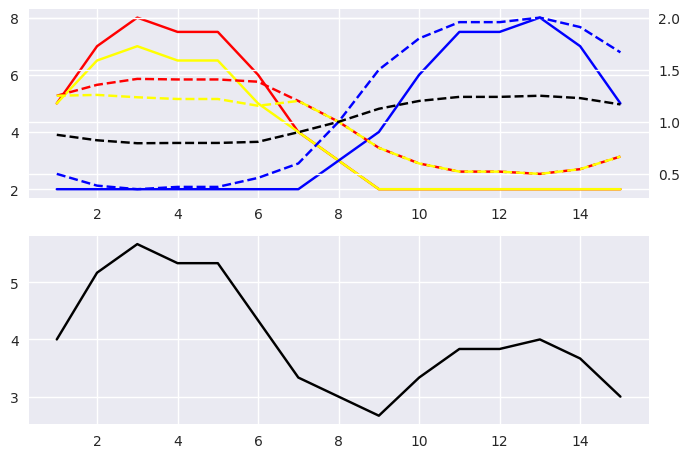

In [171]:
Ex1_RC = [50, 70, 80, 75, 75, 60, 40, 30, 20, 20, 20, 20, 20, 20, 20]
#print len(Ex1_RC)
Ex1_RC = [x*10 for x in Ex1_RC]
Ex1_L = 100

Ex2_RC = [50, 65, 70, 65, 65, 50, 40, 30, 20, 20, 20, 20, 20, 20, 20] 
Ex2_RC = [x*10 for x in Ex2_RC]
#print len(Ex2_RC)
Ex2_L = 100

Ex3_RC = [50,70,80,75,75,60,40,30,20,20,20,20,20,20,20][::-1]
Ex3_RC = [x*10 for x in Ex3_RC]
Ex3_L = 100

Exons = [(Ex1_L, Ex1_RC)] + [(Ex2_L, Ex2_RC)]*1 + [(Ex3_L, Ex3_RC)]

plot2(Exons)

GeneLen 600


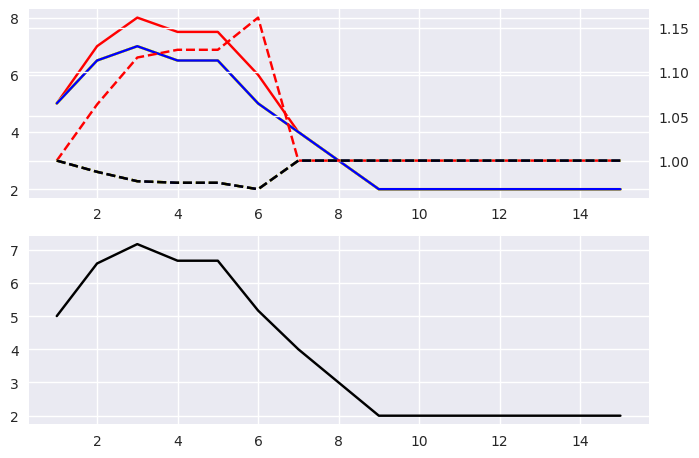

In [159]:
Ex1_RC = [50, 70, 80, 75, 75, 60, 40, 30, 20, 20, 20, 20, 20, 20, 20]
#print len(Ex1_RC)
Ex1_RC = [x*10 for x in Ex1_RC]
Ex1_L = 100

Ex2_RC = [50, 65, 70, 65, 65, 50, 40, 30, 20, 20, 20, 20, 20, 20, 20] 
Ex2_RC = [x*10 for x in Ex2_RC]
#print len(Ex2_RC)
Ex2_L = 100

Ex3_RC = [50,70,80,75,75,60,40,30,20,20,20,20,20,20,20][::-1]
Ex3_RC = [x*50 for x in Ex3_RC]
Ex3_L = 1000

#Exons = [(Ex1_L, Ex1_RC)] + [(Ex2_L, Ex2_RC)]*20 + [(Ex3_L, Ex3_RC)]
Exons = [(Ex1_L, Ex1_RC)] + [(Ex2_L, Ex2_RC)]*5
plot2(Exons)

In [140]:
# Exons: list of (Exonlength, ExonRcount) pairs
def plot3(Exons):
    plt.close('all')
    #fig, axes = plt.subplots(len(Exons)+1, dpi=100)
    fig, (ax1, ax2) = plt.subplots(2, dpi=100)
    GeneL = sum([ExonL for ExonL,ExonRC in Exons])
    print "GeneLen",GeneL
    GeneRPKM = [0] * 15
    for j in range(15): # for each time point
        for i, (lengthExon, ExonRcount) in enumerate(Exons): #for each Exon
            GeneRPKM[j] += float(ExonRcount[j])/lengthExon
        GeneRPKM[j] = GeneRPKM[j] / len(Exons)
    ax1_2 = ax1.twinx()
    for i, (lengthExon, ExonRcount) in enumerate(Exons):
        Ex_rpkm = [float(x)/lengthExon for x in ExonRcount]
        if i == 0:
            ax1.plot(xrange(1,16), Ex_rpkm, color="red")
            ax1_2.plot(xrange(1,16), [x/y for x,y in zip(Ex_rpkm,GeneRPKM)], '--', color="red")     
        #elif i == len(Exons)-1:
        #    ax1.plot(xrange(1,16), Ex_rpkm, color="blue")
        #    ax1_2.plot(xrange(1,16), [x/y for x,y in zip(Ex_rpkm,GeneRPKM)], '--', color="blue")
        else:
            ax1.plot(xrange(1,16), Ex_rpkm, color="yellow")
            ax1_2.plot(xrange(1,16), [x/y for x,y in zip(Ex_rpkm,GeneRPKM)], '--', color="yellow")
    
    ax2.plot(xrange(1,16), GeneRPKM, 'black')
    nonT = [0] * 15
    #for j in range(15):
    #    for i, (lengthExon, ExonRcount) in enumerate(Exons[1:]):
    #        nonT[j] += (float(ExonRcount[j])/lengthExon)/GeneRPKM[j]
    #    nonT[j] = nonT[j]/len(Exons[1:])
    #ax1_2.plot(xrange(1, 16), nonT, '--', color="black")
    #ax2_2 = ax2.twinx()
    #ax2_2.plot()
    #ax.axvline(x=7.5)
    plt.show()

GeneLen 600


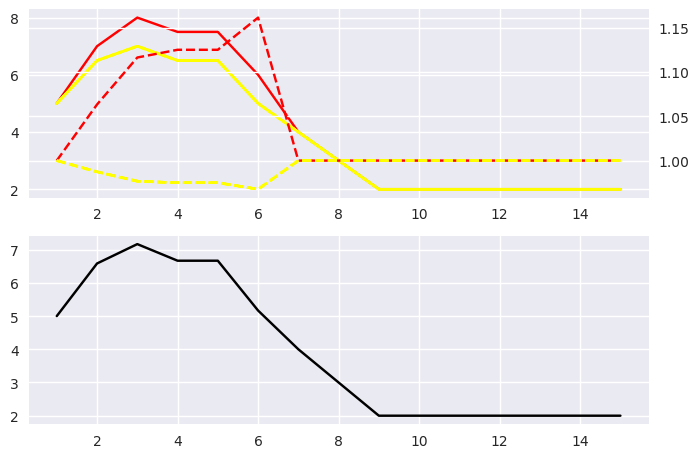

In [141]:
Ex1_RC = [50, 70, 80, 75, 75, 60, 40, 30, 20, 20, 20, 20, 20, 20, 20]
#print len(Ex1_RC)
Ex1_RC = [x*10 for x in Ex1_RC]
Ex1_L = 100

Ex2_RC = [50, 65, 70, 65, 65, 50, 40, 30, 20, 20, 20, 20, 20, 20, 20] 
Ex2_RC = [x*10 for x in Ex2_RC]
#print len(Ex2_RC)
Ex2_L = 100

Ex3_RC = [50,70,80,75,75,60,40,30,20,20,20,20,20,20,20][::-1]
Ex3_RC = [x*50 for x in Ex3_RC]
Ex3_L = 1000

#Exons = [(Ex1_L, Ex1_RC)] + [(Ex2_L, Ex2_RC)]*20 + [(Ex3_L, Ex3_RC)]
Exons = [(Ex1_L, Ex1_RC)] + [(Ex2_L, Ex2_RC)]*5
plot3(Exons)

Three 0 data at stage 1


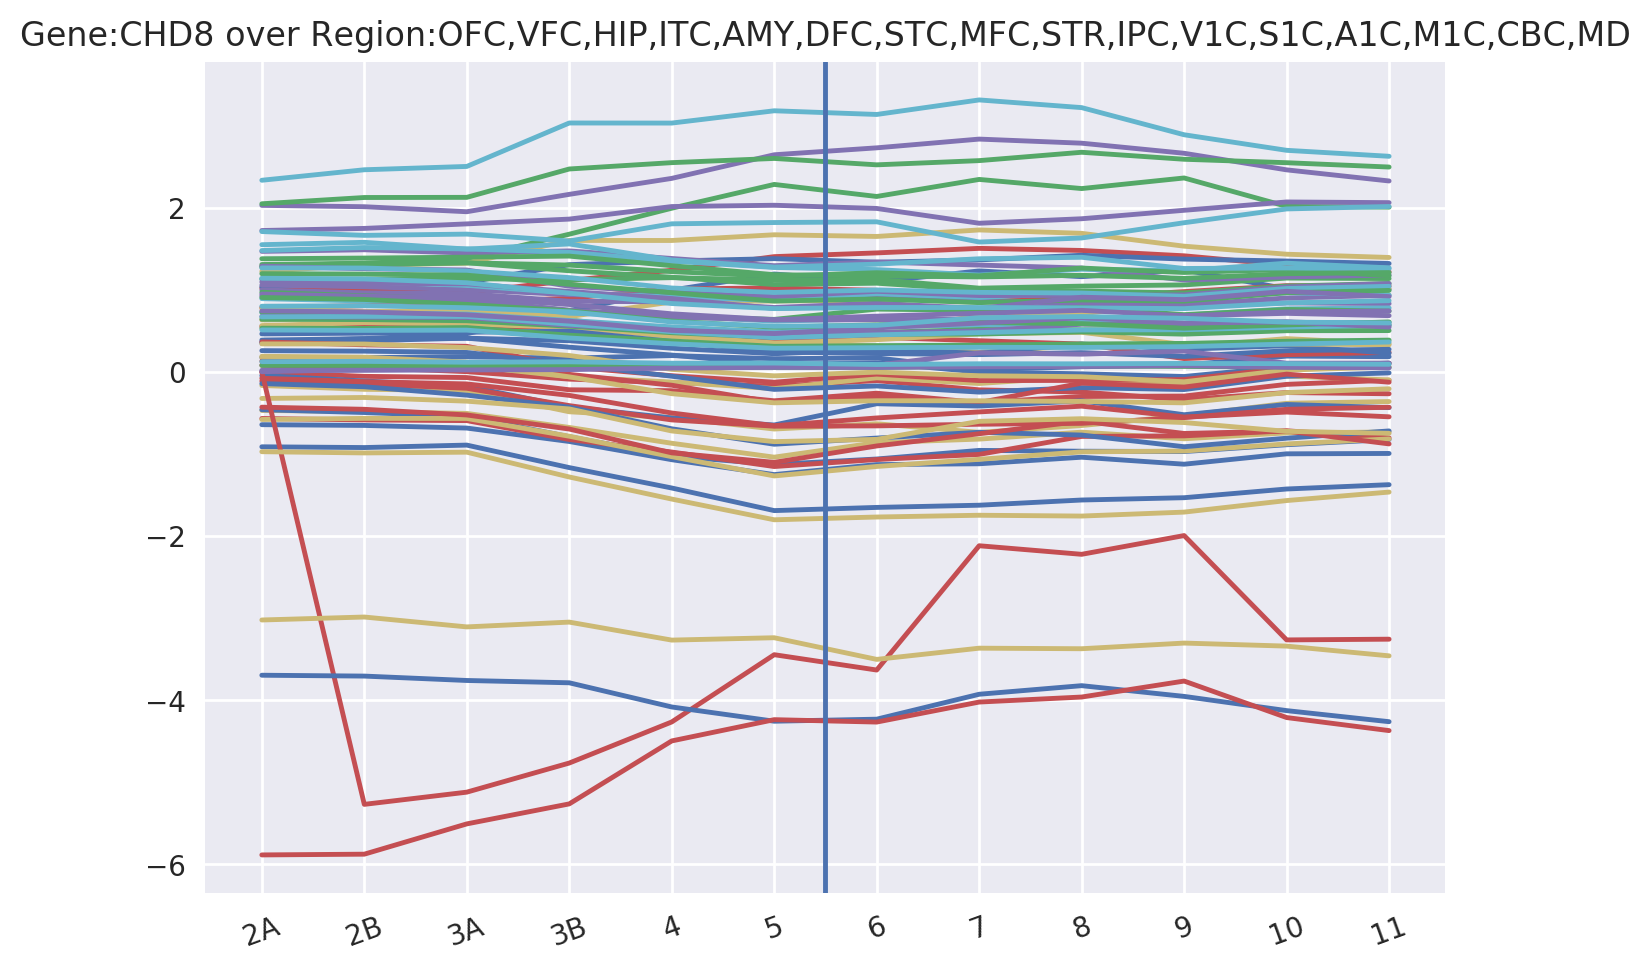

In [68]:
Gene="CHD8"
ins.LookGridSumRegion(Gene, Regionsgt20, bp_exon_row_meta, bp_exon_col_meta, NormExonExp)

In [208]:
E1 = 100
LE1 = 99
E2 = 400
LE2 = 101
print float(E1+E2)/2, float(E1*LE1+E2*LE2)/(LE1+LE2), (float(E1+E2)/2) / (float(E1*LE1+E2*LE2)/(LE1+LE2))

250.0 251.5 0.994035785288


In [248]:
mu = 100
sigma=10
s = [x for x in np.random.normal(mu, sigma, 100) if x >0][:20]
#print s
length = xrange(10,20)
A = np.mean(s)
B = sum([x*y for x,y in zip(s, length)])/sum(length)
print A, B, A/B

105.81442161 104.571027044 1.01189043085


In [249]:
print np.var(s)

114.865865417


In [299]:
# Import the OBO parser from GOATools
from goatools import obo_parser
import wget
import os
go_obo_url = 'http://purl.obolibrary.org/obo/go/go-basic.obo'
data_folder = os.getcwd() + '/data'

# Check if we have the ./data directory already
if(not os.path.isfile(data_folder)):
    # Emulate mkdir -p (no error if folder exists)
    try:
        os.mkdir(data_folder)
    except OSError as e:
        if(e.errno != 17):
            raise e
else:
    raise Exception('Data path (' + data_folder + ') exists as a file. '
                   'Please rename, remove or change the desired location of the data path.')

# Check if the file exists already
if(not os.path.isfile(data_folder+'/go-basic.obo')):
    go_obo = wget.download(go_obo_url, data_folder+'/go-basic.obo')
else:
    go_obo = data_folder+'/go-basic.obo'

In [300]:
print(go_obo)
#GO:2000270

/Users/jiayao/Work/BrainDisorders/src/data/go-basic.obo


In [301]:
go = obo_parser.GODag(go_obo)

/Users/jiayao/Work/BrainDisorders/src/data/go-basic.obo: fmt(1.2) rel(2018-10-19) 47,359 GO Terms


In [314]:
go_id = 'GO:2000270'
go_term = go[go_id]
print(go_term)

GO:2000270	level-08	depth-08	negative regulation of fibroblast apoptotic process [biological_process]


In [302]:
def transitive_closure(go_term, go):
    go_term_set = set()
    find_parents(go_term, go, go_term_set)
    find_children(go_term, go, go_term_set)
    return go_term_set
    
def find_parents(term1, go, go_term_set={}, ret=False):
    for term2 in term1.parents:
        go_term_set.update({term2})
        
        # Recurse on term to find all parents
        find_parents(term2, go, go_term_set)          
    if(ret):
        return go_term_set

def find_children(term1, go, go_term_set={}, ret=False):
    for term2 in term1.children:
        go_term_set.update({term2})
        
        # Recurse on term to find all children
        find_children(term2, go, go_term_set)
    if(ret):
        return go_term_set

In [305]:
keywrod = "channel"
growth_count = 0
for go_term in go.values():
    if 'channel' in go_term.name:
        growth_count += 1
        
print('Number of GO terms with "growth" in their name: {}'.format(growth_count))

Number of GO terms with "growth" in their name: 357


In [284]:
import Bio.UniProt.GOA as GOA

In [286]:
import os
from ftplib import FTP
arab_uri = '/Users/jiayao/Work/Resources/GO/goa_human.gaf.gz'
data_folder = '/Users/jiayao/Work/Resources/GO/'
arab_fn = arab_uri.split('/')[-1]

# Check if the file exists already
arab_gaf = os.path.join(data_folder, arab_fn)
if(not os.path.isfile(arab_gaf)):
    # Login to FTP server
    ebi_ftp = FTP('ftp.ebi.ac.uk')
    ebi_ftp.login() # Logs in anonymously
    
    # Download
    with open(arab_gaf,'wb') as arab_fp:
        ebi_ftp.retrbinary('RETR {}'.format(arab_uri), arab_fp.write)
        
    # Logout from FTP server
    ebi_ftp.quit()

In [312]:
import gzip

# File is a gunzip file, so we need to open it in this way
with gzip.open(arab_gaf, 'rt') as arab_gaf_fp:
    arab_funcs = {}  # Initialise the dictionary of functions
    
    # Iterate on each function using Bio.UniProt.GOA library.
    for entry in GOA.gafiterator(arab_gaf_fp):
        uniprot_id = entry.pop('DB_Object_Symbol')
        arab_funcs[uniprot_id] = entry

In [313]:
print(arab_funcs["CHD8"])

{'Synonym': ['CHD8', 'HELSNF1', 'KIAA1564'], 'Qualifier': [''], 'Date': '20181006', 'Assigned_By': 'Ensembl', 'DB_Object_Name': 'Chromodomain-helicase-DNA-binding protein 8', 'Annotation_Extension': '', 'DB': 'UniProtKB', 'GO_ID': 'GO:2000270', 'Taxon_ID': ['taxon:9606'], 'DB:Reference': ['GO_REF:0000107'], 'DB_Object_Type': 'protein', 'Aspect': 'P', 'DB_Object_ID': 'Q9HCK8', 'With': ['UniProtKB:Q09XV5', 'ensembl:ENSMUSP00000142890'], 'Gene_Product_Form_ID': '', 'Evidence': 'IEA'}


In [316]:
print go["GO:2000270"]

GO:2000270	level-08	depth-08	negative regulation of fibroblast apoptotic process [biological_process]


In [289]:
not_count = 0
total_count = len(arab_funcs)
for func in arab_funcs.values():
    if 'NOT' in func['Qualifier']:
        not_count += 1
        

print('Total count of NOT qualifiers: {} ({}%)'.format(not_count, round(((float(not_count)/float(total_count))*100),2)))
print('Total number of annotations: {}'.format(total_count))

Total count of NOT qualifiers: 625 (3.17%)
Total number of annotations: 19703


In [293]:
arab_tax_id = 9606  # This isn't necessary here, but would be with the full data set.
go_id = 'GO:0048527'
annot_count = 0
counted_gene = []
for uniprot_id in arab_funcs:
    if('taxon:' + str(arab_tax_id) in arab_funcs[uniprot_id]['Taxon_ID']):
        if((arab_funcs[uniprot_id]['GO_ID'] == go_id)):
            counted_gene.append(uniprot_id)
            annot_count += 1
del counted_gene

In [294]:
print(annot_count)

0


In [298]:
keyword = 'channel'
growth_dict = {x: arab_funcs[x]
               for x in arab_funcs 
               if keyword in arab_funcs[x]['DB_Object_Name']}
print('UniProt IDs of annotations with "growth" in their name:')
for annot in growth_dict:
    print("\t - " + annot)
print("Total: {}".format(len(growth_dict)))

UniProt IDs of annotations with "growth" in their name:
	 - Q9UGI6
	 - Q12809
	 - Q9NPI9
	 - A0A0G2JLG4
	 - O60928
	 - Q9UBN1
	 - Q9NPA1
	 - Q9NY72
	 - Q9Y4C2
	 - P51801
	 - O60840
	 - O60741
	 - O43525
	 - Q9NVV0
	 - O43448
	 - O43526
	 - Q9NS40
	 - Q14524
	 - Q9BXT2
	 - P63252
	 - Q7RTX7
	 - Q9P0X4
	 - Q9Y277
	 - Q9UHC3
	 - Q96RP8
	 - Q8NHX9
	 - Q9UF02
	 - Q92806
	 - Q9Y257
	 - Q8NCM2
	 - Q9BSA9
	 - P51172
	 - Q9UQC9
	 - Q96T54
	 - Q8WWG9
	 - Q9ULD8
	 - P37088
	 - Q96D31
	 - Q6P9F7
	 - P56696
	 - Q9HCX4
	 - Q9P1Z3
	 - O95259
	 - O94759
	 - Q9Y6J6
	 - A0A1B0GVM2
	 - Q6NSJ5
	 - Q96T55
	 - Q5JUK3
	 - P51788
	 - Q86XQ3
	 - Q07699
	 - Q8TDN2
	 - Q8TDN1
	 - P51787
	 - P48048
	 - Q14500
	 - Q00975
	 - Q92952
	 - Q92953
	 - A8K7I4
	 - Q8NER1
	 - P51800
	 - Q6UVM3
	 - P15382
	 - Q9Y696
	 - Q9BQ31
	 - P78348
	 - Q9Y691
	 - O00555
	 - Q9UQD0
	 - P78508
	 - Q15878
	 - Q9Y698
	 - P57789
	 - Q9UIX4
	 - Q9UQ05
	 - Q9Y2U2
	 - Q9NQA5
	 - Q8N5I3
	 - Q8IZS8
	 - Q9H252
	 - P48547
	 - Q9NPC2
	 - P48544
	

In [317]:
5e-2

0.05

In [3]:
X = [[1,2,3],[4,5,6],[7,8,9]]
X

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

In [4]:
X[1,:]

TypeError: list indices must be integers or slices, not tuple

In [5]:
X = [5,3,6,3,1]
X

[5, 3, 6, 3, 1]

In [7]:
sorted(X, reverse=True)

[6, 5, 3, 3, 1]

In [10]:
3.0/12

0.25

In [12]:
10*9*8*7

5040

In [17]:
from scipy.integrate import quad
import math

In [18]:
def f(x, n):
    return math.pow(x, n) * math.pow((1+x), 0.5)

In [28]:
for n in range(100,110,1):
    res, err = quad(f, 0, 1, args=(n))
    print(res, n, 1/(n+1), 1/(2*(n+1)),  1/(n+1) + 1/(2*(n+1)))

0.013967711664603484 100 0.009900990099009901 0.0049504950495049506 0.01485148514851485
0.013831104845085247 101 0.00980392156862745 0.004901960784313725 0.014705882352941176
0.01369714425649753 102 0.009708737864077669 0.0048543689320388345 0.014563106796116504
0.013565753744755445 103 0.009615384615384616 0.004807692307692308 0.014423076923076924
0.013436860050157566 104 0.009523809523809525 0.004761904761904762 0.014285714285714287
0.013310392671170377 105 0.009433962264150943 0.0047169811320754715 0.014150943396226415
0.013186283735833764 106 0.009345794392523364 0.004672897196261682 0.014018691588785045
0.013064467880294715 107 0.009259259259259259 0.004629629629629629 0.013888888888888888
0.01294488213401242 108 0.009174311926605505 0.0045871559633027525 0.013761467889908258
0.012827465811211183 109 0.00909090909090909 0.004545454545454545 0.013636363636363636


In [52]:
import random
def sim():
    A = 1
    B = 2
    while A > 0 and B > 0:
        if random.random() > 1/3:
            A += 1
            B -= 1
        else:
            A -= 1
            B += 1
    if A == 0:
        return False
    else:
        return True
A = 0
for i in range(100000):
    res = sim()
    #$print(res)
    if res:
        A += 1
print(A/100000)

0.57292


In [37]:
4/7

0.5714285714285714

In [38]:
7/12

0.5833333333333334

In [53]:
math.pow(0.5, 10)

0.0009765625

In [54]:
0.0009765625 * 999/1000

0.0009755859375

In [55]:
0.001 / (0.0009755859375 + 0.001)

0.5061789421651013

In [70]:
p = 0.20
All_N = 0
for i in range(10000):
    N = 0
    seq = []
    while(1):
        N += 1
        if random.random() < p:
            seq.append('H')
        else:
            seq.append('T')
        if len(seq) >= 3:
            if seq[-3:] == ['H', 'T', 'H']:
                break
    All_N += N
print(All_N/10000)

36.266
